# Mushroom Classification in Python

This project is taken from: https://medium.com/analytics-vidhya/mushroom-classification-using-different-classifiers-aa338c1cd0ff. 
It represents my first attempt at a classification project, hence why I used the tutorial.

I aim to include some of my own code to demonstrate my understanding of different classification algorithms. The first part whereby I split the data to see which class we can classify the data by is taken from the link above.

## Import all libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve

In [62]:
df = pd.read_csv('datasets/mushrooms.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## We want to classify mushrooms as poisonous or edible

In [63]:
df['class'].unique()

array(['p', 'e'], dtype=object)

## Checking the split of poisonous and edible

We want the dataset to be relatively balanced between the two categories to ensure maximal accuracy, and so the model does not skew towards one category in particular.

c:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


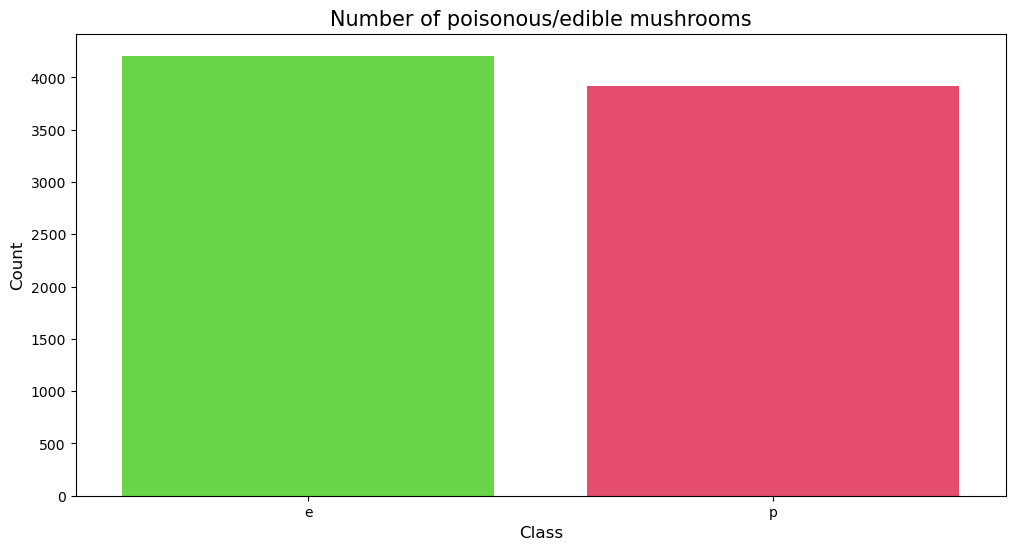

In [ ]:
count = df['class'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(count.index, 
            count.values, 
            alpha=0.8, 
            palette="prism")

plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title("Number of poisonous/edible mushrooms", fontsize=15)
plt.show()

In [65]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

## Encoding the labels to numerical values

Encoding is a common technique as we want to work with numerical data, so converting it from a textual form to numerical form is necessary.

In [66]:
labels = LabelEncoder()
for col in df.columns:
    df[col] = labels.fit_transform(df[col])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [67]:
df = df.drop(['veil-type'], axis=1)

## Creating a violin plot

Apart from looking super fancy, this graph helps visualise the characteristics of the data.

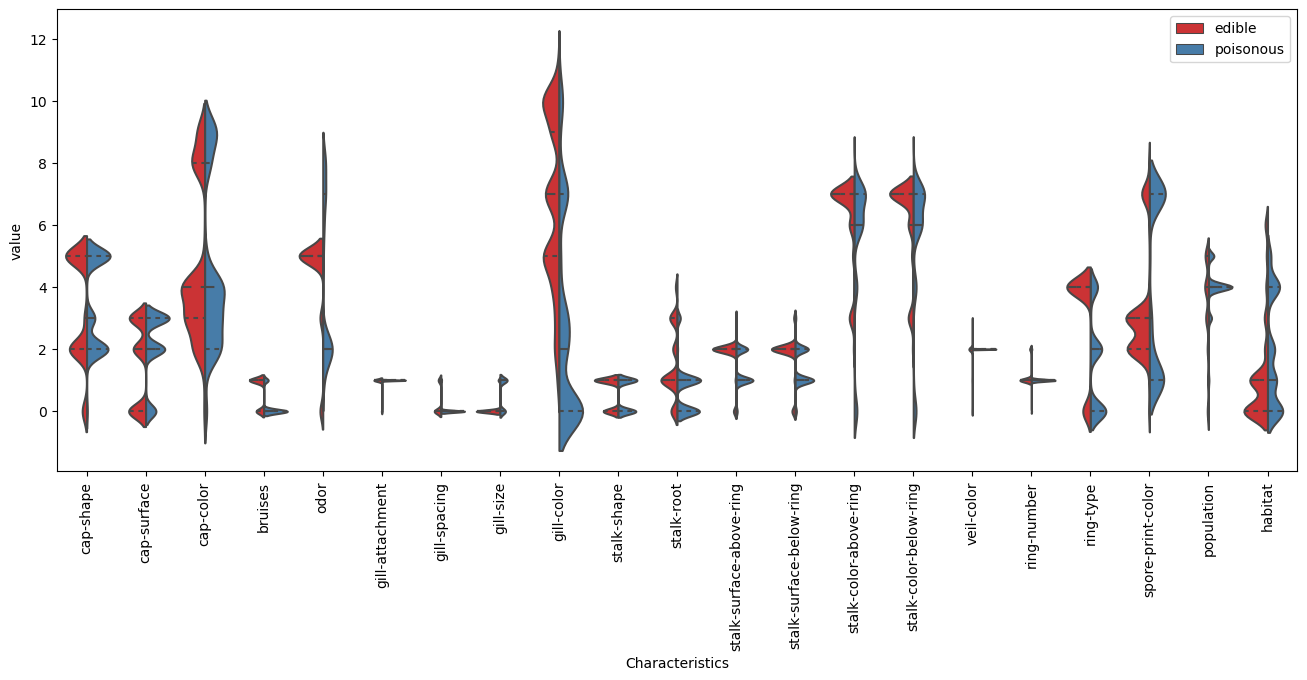

In [68]:
df_div = pd.melt(df, 'class', var_name='Characteristics')

fig, ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax = ax, 
                   x='Characteristics', 
                   y='value', 
                   hue='class',
                   split=True, 
                   data=df_div, 
                   inner = 'quartile', 
                   palette = ('Set1'))

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [{'0': 'edible', '1': 'poisonous'}[label] for label in labels])

df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))

plt.show()

Taking a quick look at the results shows us some promising results. We can see that the characteristics of gill-color can be broken into two part, one below 3 and one above 3. We will verify this in the next step.

## Plotting a heatmap of each feature

This helps visualise the data and understand relationships within the data.

It is normal to pick the least correlating variable, which as you will see, in this case is 'gill-color' with a value of -0.53

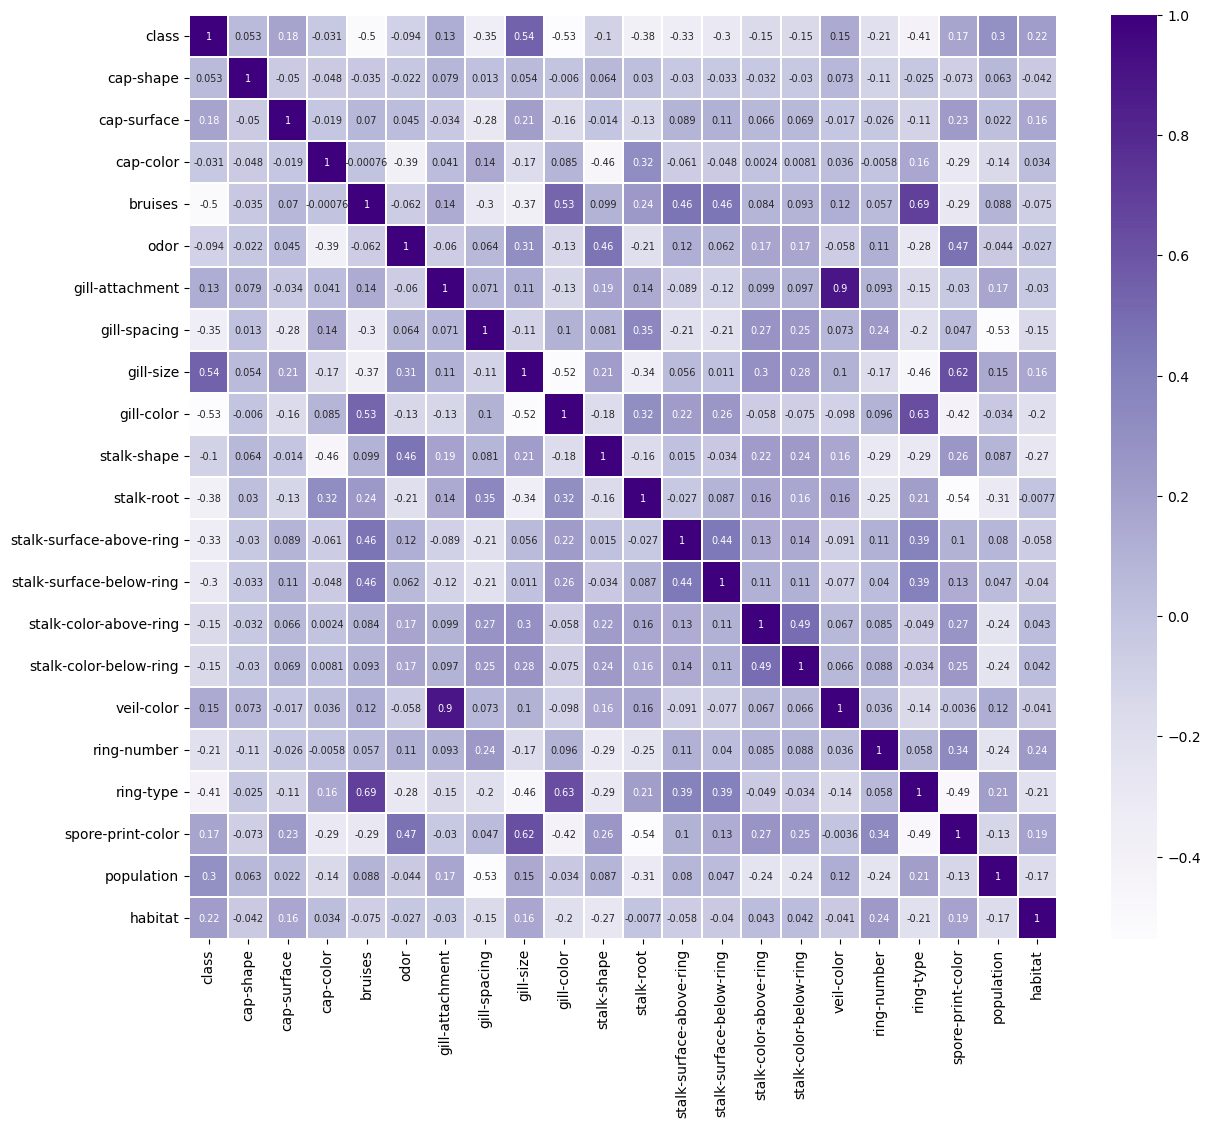

In [69]:
plt.figure(figsize=(14, 12))

sns.heatmap(df.corr(),
            linewidths=.1, 
            cmap="Purples",
            annot=True, 
            annot_kws={"size": 7})

plt.yticks(rotation=0)
plt.show()

In [70]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False)\
    .mean()\
    .sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


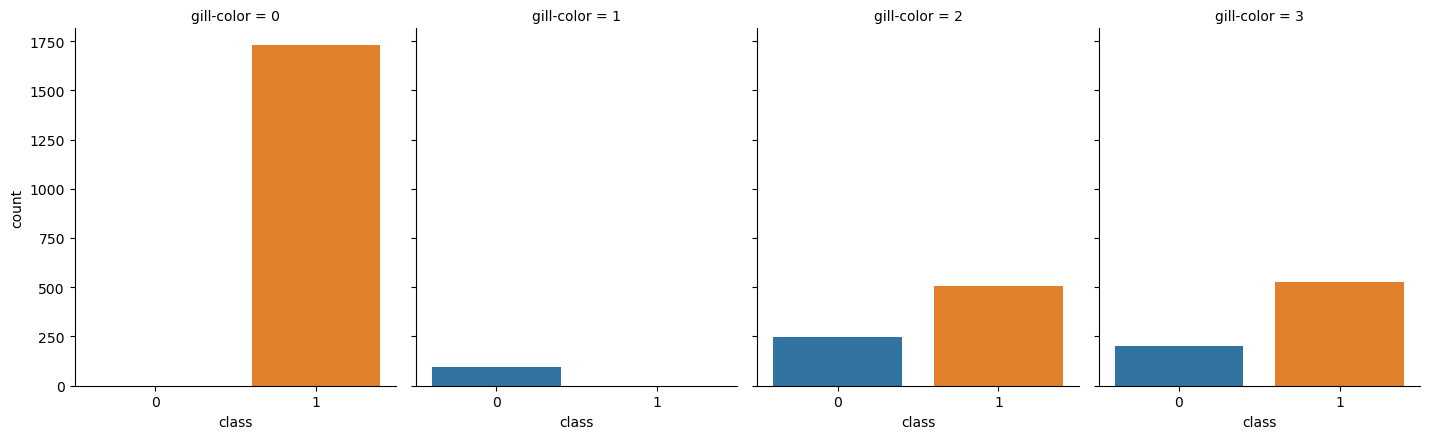

In [71]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] <= 3.5]

sns.catplot(x='class', 
            col='gill-color', 
            data=new_var, 
            kind='count', 
            height=4.5, 
            aspect=.8, 
            col_wrap=4)

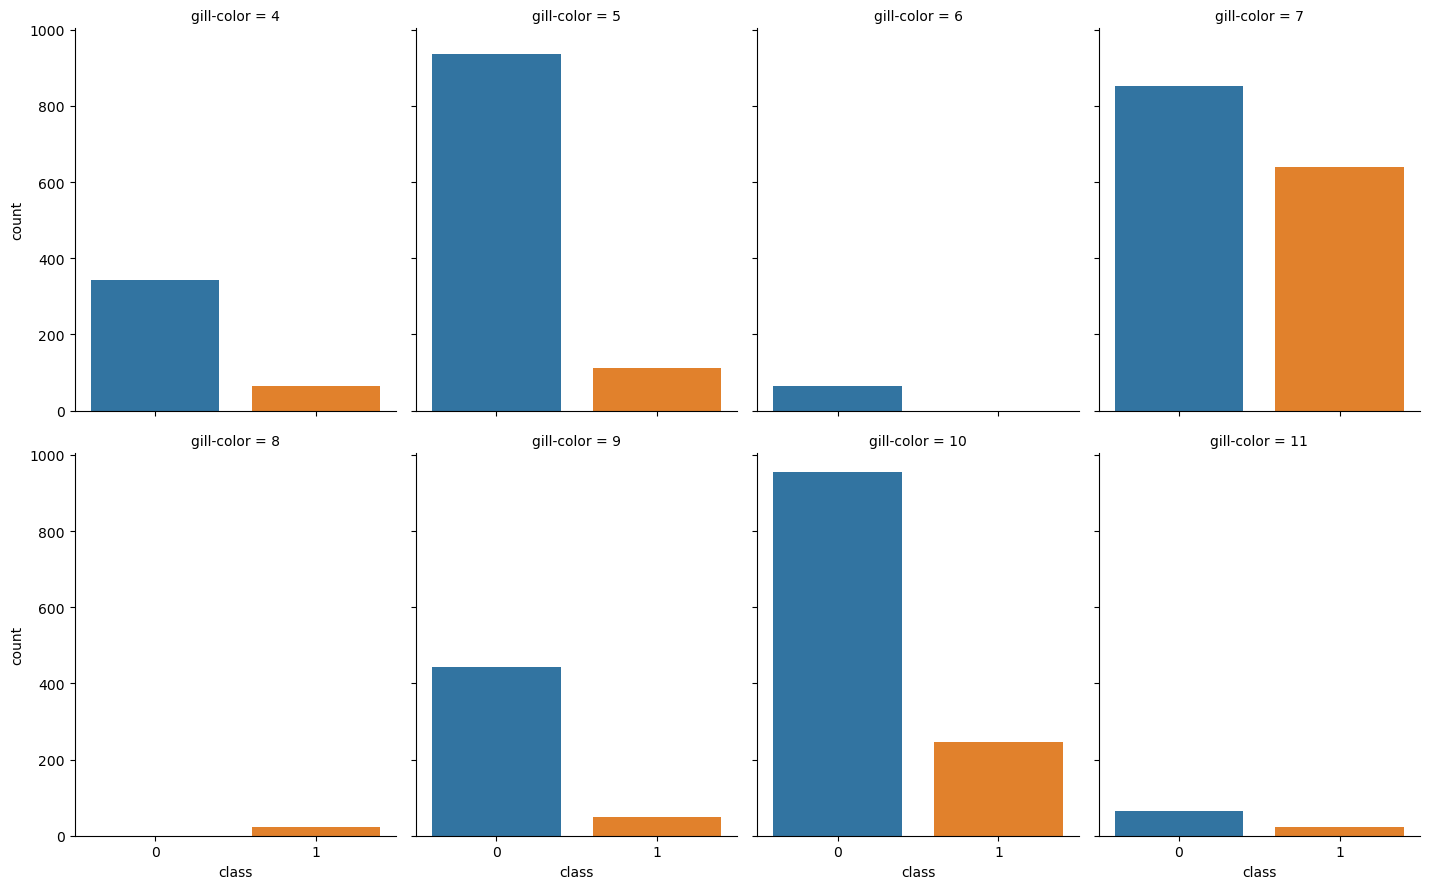

In [72]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color'] > 3.5]

sns.catplot(x='class', 
            col='gill-color', 
            data=new_var, 
            kind='count', 
            height=4.5, 
            aspect=.8, 
            col_wrap=4)

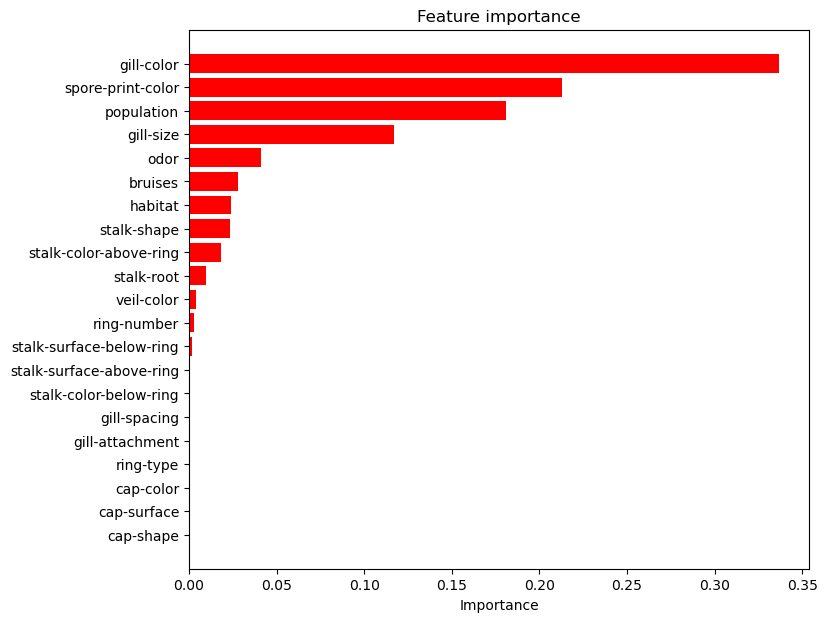

In [73]:
X = df.drop(['class'], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, test_size=0.2)
    
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8, 7))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='red')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

## Prediction using my own implementation of a KNN-classifier

This code is taken from a university project where I had to implement a KNN-classifier.

In [77]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric='euclidean', k=1):
    # Calculate an m x n distance matrix
    pairwise_distance = cdist(test_samples, training_data, metric=metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance)[:, :k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = np.array(training_labels)[nearest_neighbours]
    
    # [0] to ignore the count array scipy.states returns
    return np.squeeze(scipy.stats.mode(nearest_labels, axis=1, keepdims=False)[0])

## Predict class and compute accuracy of the predictions

In [79]:
y_pred = knn_classify(X_test, X_train, y_train, k=5)

accuracy = np.mean(y_pred == y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 99.63%


## Visualise predictions

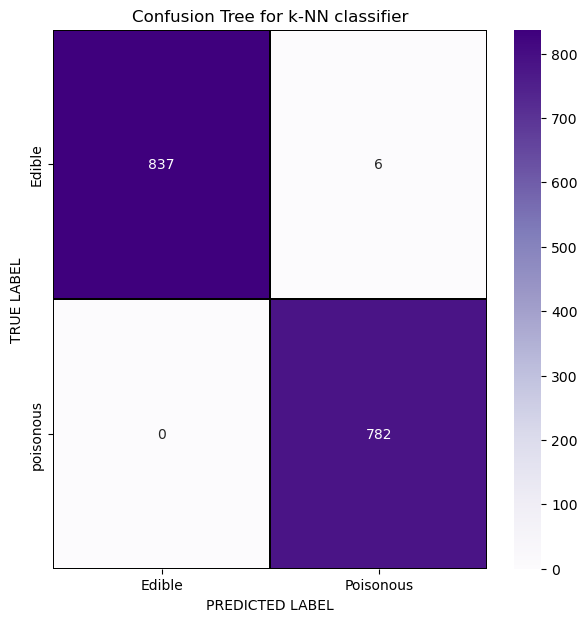

In [76]:
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "poisonous"]

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, 
            annot=True, 
            linewidths=0.2, 
            linecolor="black", 
            fmt=".0f", 
            ax=ax,
            cmap="Purples",
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Tree for k-NN classifier")
plt.show()